# Actor Success
We want to know what metrics define a sucessful acting career. We will use the Oscar, IMDB Dataset, The CMU movie dataset, the rotten tomatoes dataset for this. 
First we need to define what a successful actor is. We start with a simple metric that counts the number os Oscar nominations and wins. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
oscar = pd.read_pickle('../../pickles/oskar_df.pkl')
imdb = pd.read_pickle('../../pickles/imdb_data.pkl')
cmu = pd.read_pickle('../../pickles/cmu_movies_df.pkl')
rotten = pd.read_pickle('../../pickles/rotten_tomatoes.pkl')

In [3]:
oscar.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [4]:
# only keep categories that are relevant for actors
oscar = oscar[oscar['category'].str.contains('ACTOR') | oscar['category'].str.contains('ACTRESS')]
oscar.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [5]:
# now define a score for each actor where nomination is 1 and win is 2
oscar['score'] = oscar['winner'].apply(lambda x: 2 if x == True else 1)
oscar.head()

,year_film,year_ceremony,ceremony,category,name,film,winner,score
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False,1
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,2
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False,1
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,2
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False,1


In [6]:
# group by actor and sum the score
successful_actors = oscar.groupby('name').sum()
successful_actors.head()

,year_film,year_ceremony,ceremony,category,film,winner,score
name,,,,,,,
Abigail Breslin,2006,2007,79,ACTRESS IN A SUPPORTING ROLE,Little Miss Sunshine,0,1
Adam Driver,4037,4039,183,ACTOR IN A SUPPORTING ROLEACTOR IN A LEADING ROLE,BlacKkKlansmanMarriage Story,0,2
Adolph Caesar,1984,1985,57,ACTOR IN A SUPPORTING ROLE,A Soldier's Story,0,1
Adolphe Menjou,1930,1931,4,ACTOR,The Front Page,0,1
Adriana Barraza,2006,2007,79,ACTRESS IN A SUPPORTING ROLE,Babel,0,1


In [7]:
# now sort by score and show the top 50
successful_actors = successful_actors.sort_values(by='score', ascending=False)
successful_actors.head(5)

,year_film,year_ceremony,ceremony,category,film,winner,score
name,,,,,,,
Meryl Streep,41941,41962,1474,ACTRESS IN A SUPPORTING ROLEACTRESS IN A SUPPO...,The Deer HunterKramer vs. KramerThe French Lie...,3,24
Katharine Hepburn,23448,23460,325,ACTRESSACTRESSACTRESSACTRESSACTRESSACTRESSACTR...,Morning GloryAlice AdamsThe Philadelphia Story...,4,16
Jack Nicholson,23788,23800,664,ACTOR IN A SUPPORTING ROLEACTORACTORACTORACTOR...,Easy RiderFive Easy PiecesThe Last DetailChina...,3,15
Bette Davis,21377,21388,180,ACTRESSACTRESSACTRESSACTRESSACTRESSACTRESSACTR...,Of Human BondageDangerousJezebelDark VictoryTh...,2,13
Denzel Washington,18034,18043,691,ACTOR IN A SUPPORTING ROLEACTOR IN A SUPPORTIN...,Cry FreedomGloryMalcolm XThe HurricaneTraining...,2,11


In [8]:
# drop the year_film, year_ceremony, ceremony, category, film and winner columns
successful_actors = successful_actors.drop(columns=['year_film', 'year_ceremony', 'ceremony', 'category', 'film', 'winner'])


In [9]:
# rename 'name' to 'actor' and 'score' to 'oscar_score'
successful_actors = successful_actors.rename(columns={'name': 'actor', 'score': 'oscar_score'})
successful_actors.head()

,oscar_score
name,
Meryl Streep,24
Katharine Hepburn,16
Jack Nicholson,15
Bette Davis,13
Denzel Washington,11


In [10]:
successful_actors.head(5)

,oscar_score
name,
Meryl Streep,24
Katharine Hepburn,16
Jack Nicholson,15
Bette Davis,13
Denzel Washington,11


In [11]:
imdb.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


to get a more refined score, we will use the IMDB dataset to get the average rating of the actors movies and add it to the oscar score.

# Calculate IMDB Score
We use the IMDB dataset to calculate the average rating of the actors' movies and add it to the Oscar score.

In [12]:
successful_actors['imdb_score'] = 0
successful_actors['num_movies'] = 0
# the actor name is in the 'crew' column which contains comma separated values of all the actors in the movie
# we will split the string and check if the actor is in the string
# if he is, we will add the rating to the imdb_score
for index, row in imdb.iterrows():
    for actor in successful_actors.index:
        if actor in str(row['crew']):
            successful_actors.loc[actor, 'imdb_score'] += row['score']
            successful_actors.loc[actor, 'num_movies'] += 1
# now we need to divide the imdb_score by the number of movies the actor was in and divide aerage score by 10
successful_actors['imdb_score'] = (successful_actors['imdb_score'] / successful_actors['num_movies']) / 10
successful_actors.head()

,oscar_score,imdb_score,num_movies
name,,,
Meryl Streep,24,6.993103,29
Katharine Hepburn,16,7.500000,5
Jack Nicholson,15,7.058824,17
Bette Davis,13,7.733333,3
Denzel Washington,11,6.694595,37


# Filter Actors with IMDB Score
We drop all actors that have no IMDB score and print how many actors are left.

In [13]:
# drop all actors that have no imdb score and print how many actors are left
before = successful_actors.shape[0]
successful_actors = successful_actors[successful_actors['imdb_score'] != 0]
after = successful_actors.shape[0]
print(f'{before - after} actors were dropped')

0 actors were dropped


We add a final score column that is the sum of the Oscar score and the IMDB score.


In [14]:
#add a final_score column that is the sum of the oscar_score and the imdb_score
successful_actors['final_score'] = successful_actors['oscar_score'] + successful_actors['imdb_score']
successful_actors.head()

,oscar_score,imdb_score,num_movies,final_score
name,,,,
Meryl Streep,24,6.993103,29,30.993103
Katharine Hepburn,16,7.500000,5,23.500000
Jack Nicholson,15,7.058824,17,22.058824
Bette Davis,13,7.733333,3,20.733333
Denzel Washington,11,6.694595,37,17.694595


In [15]:
successful_actors.head(5)

,oscar_score,imdb_score,num_movies,final_score
name,,,,
Meryl Streep,24,6.993103,29,30.993103
Katharine Hepburn,16,7.500000,5,23.500000
Jack Nicholson,15,7.058824,17,22.058824
Bette Davis,13,7.733333,3,20.733333
Denzel Washington,11,6.694595,37,17.694595


In [16]:
rotten.head(5)

,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,...,writer,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew
0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,...,"Ryan Coogler, Joe Robert Cole","Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,...,"Christopher Markus, Stephen McFeely","Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."
2,Mission: Impossible -- Fallout,2018,Ethan Hunt and the IMF team join forces with C...,97,88.0,"Fast, sleek, and fun, Mission: Impossible - Fa...",433,"10,000+",Action & Adventure,PG-13 (Intense Sequences of Action|Brief Stron...,...,Christopher McQuarrie,"Jul 27, 2018 wide","Nov 20, 2018",$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",Scope (2.35:1),NaN,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P..."
3,Mad Max: Fury Road,2015,"Years after the collapse of civilization, the ...",97,86.0,With exhilarating action and a surprising amou...,427,"100,000+",Action & Adventure,R (Intense Sequences of Violence|Disturbing Im...,...,"George Miller, Brendan McCarthy, Nick Lathouris","May 15, 2015 wide","Aug 10, 2016",$153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,Scope (2.35:1),NaN,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu..."
4,Spider-Man: Into the Spider-Verse,2018,"Bitten by a radioactive spider in the subway, ...",97,93.0,Spider-Man: Into the Spider-Verse matches bold...,387,"10,000+",Action & Adventure,PG (Mild Language|Frenetic Action Violence|The...,...,"Phil Lord, Rodney Rothman","Dec 14, 2018 wide","Mar 7, 2019",$190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),NaN,"Shameik Moore, Hailee Steinfeld, Mahershala Al..."


We load additional actor data and clean it up by dropping unnecessary columns and transforming date columns.


In [17]:
actor_df = pd.read_pickle('../../pickles/actor_df.pkl')
actor_df.head()


,name,id,adult,also_known_as,biography,birthday,deathday,gender,homepage,imdb_id,known_for_department,place_of_birth,popularity,profile_path
0,Richard Barthelmess,13789.0,False,"[Richard Semler Barthelmess, Richard S. Barthe...","From Wikipedia, the free encyclopedia. \n\nRic...",1895-05-08,1963-08-17,2.0,None,nm0001932,Acting,"New York City, New York, USA",1.079,/p7nmZeuQjHOsNFgqgEXBdh78OSC.jpg
1,Emil Jannings,2895.0,False,[Theodor Friedrich Emil Janenz],Emil Jannings (1884–1950) was a German actor. ...,1884-07-22,1950-01-02,2.0,None,nm0417837,Acting,"Rorschach, Switzerland",2.945,/yX7AFfYgYit6WlPshockLsP40LB.jpg
2,Louise Dresser,146141.0,False,"[Lulu Josephine Kerlin, Louise Josephine Kerlin]",,1878-10-03,1965-04-24,1.0,None,nm0237571,Acting,"Evansville, Indiana, USA",1.564,/i7NYAqqzY6uhI0IEcwPeYP9tNKt.jpg
3,Janet Gaynor,9088.0,False,"[Laura Augusta Gainor, Джанет Гейнор]","Janet Gaynor (October 6, 1906 – September 14, ...",1906-10-06,1984-09-14,1.0,None,nm0310980,Acting,"Philadelphia, Pennsylvania, USA",2.692,/kwyClWei18GOssMPbrs4RL61izG.jpg
4,Gloria Swanson,8629.0,False,"[Gloria May Josephine Svensson, Gloria Mae, Гл...","Gloria Swanson (March 27, 1899 – April 4, 1983...",1899-03-27,1983-04-04,1.0,None,nm0841797,Acting,"Chicago, Illinois, USA",3.541,/akmlp75ESHjtGOVtOCfJYxkX4eo.jpg


In [18]:
# drop the following columns: also_known_as, adult, biography, imdb_id, profile_path
actor_df = actor_df.drop(columns=['also_known_as', 'adult', 'biography', 'imdb_id', 'profile_path', 'homepage'])

In [19]:
actor_df.head(5)

,name,id,birthday,deathday,gender,known_for_department,place_of_birth,popularity
0,Richard Barthelmess,13789.0,1895-05-08,1963-08-17,2.0,Acting,"New York City, New York, USA",1.079
1,Emil Jannings,2895.0,1884-07-22,1950-01-02,2.0,Acting,"Rorschach, Switzerland",2.945
2,Louise Dresser,146141.0,1878-10-03,1965-04-24,1.0,Acting,"Evansville, Indiana, USA",1.564
3,Janet Gaynor,9088.0,1906-10-06,1984-09-14,1.0,Acting,"Philadelphia, Pennsylvania, USA",2.692
4,Gloria Swanson,8629.0,1899-03-27,1983-04-04,1.0,Acting,"Chicago, Illinois, USA",3.541


In [20]:
# transform the birthday and deathday columns to datetime and then only keep the year
actor_df['birthday'] = pd.to_datetime(actor_df['birthday'])
actor_df['birthday'] = actor_df['birthday'].dt.year
actor_df['deathday'] = pd.to_datetime(actor_df['deathday'])
actor_df['deathday'] = actor_df['deathday'].dt.year

In [21]:
# keep only the country of birth instead of the full location
actor_df['place_of_birth'] = actor_df['place_of_birth'].str.split(',').str[-1]

In [22]:
actor_df.head(5)

,name,id,birthday,deathday,gender,known_for_department,place_of_birth,popularity
0,Richard Barthelmess,13789.0,1895.0,1963.0,2.0,Acting,USA,1.079
1,Emil Jannings,2895.0,1884.0,1950.0,2.0,Acting,Switzerland,2.945
2,Louise Dresser,146141.0,1878.0,1965.0,1.0,Acting,USA,1.564
3,Janet Gaynor,9088.0,1906.0,1984.0,1.0,Acting,USA,2.692
4,Gloria Swanson,8629.0,1899.0,1983.0,1.0,Acting,USA,3.541


In [23]:
# drop popularity
actor_df = actor_df.drop(columns=['popularity'])

We combine the actor data with the successful actors dataframe and filter to keep only actors known for acting.

In [24]:
# now combine the actor_df with the successful_actors dataframe
actor_df = actor_df.set_index('name')
# map gender 2 to M and 1 to F
actor_df['gender'] = actor_df.gender.map({2: 'M', 1: 'F'})
actor_df.head()

,id,birthday,deathday,gender,known_for_department,place_of_birth
name,,,,,,
Richard Barthelmess,13789.0,1895.0,1963.0,M,Acting,USA
Emil Jannings,2895.0,1884.0,1950.0,M,Acting,Switzerland
Louise Dresser,146141.0,1878.0,1965.0,F,Acting,USA
Janet Gaynor,9088.0,1906.0,1984.0,F,Acting,USA
Gloria Swanson,8629.0,1899.0,1983.0,F,Acting,USA


In [25]:
successful_actors = successful_actors.join(actor_df)

In [26]:
successful_actors.head(5)
print(len(successful_actors))

982


In [27]:
# only keep the actors that have known_for_department == 'Acting'
successful_actors = successful_actors[successful_actors['known_for_department'] == 'Acting']
successful_actors.head(5)

,oscar_score,imdb_score,num_movies,final_score,id,birthday,deathday,gender,known_for_department,place_of_birth
name,,,,,,,,,,
Jack Nicholson,15,7.058824,17,22.058824,514.0,1996.0,NaN,F,Acting,UK
Paul Newman,10,7.158333,12,17.158333,3636.0,1947.0,NaN,M,Acting,France
Jack Lemmon,10,7.400000,7,17.400000,3151.0,1937.0,NaN,M,Acting,USA
Marlon Brando,10,7.500000,8,17.500000,3084.0,1949.0,NaN,F,Acting,USA
Dustin Hoffman,9,6.840625,32,15.840625,4483.0,1962.0,NaN,M,Acting,USA


In [28]:
successful_actors.head(5)

,oscar_score,imdb_score,num_movies,final_score,id,birthday,deathday,gender,known_for_department,place_of_birth
name,,,,,,,,,,
Jack Nicholson,15,7.058824,17,22.058824,514.0,1996.0,NaN,F,Acting,UK
Paul Newman,10,7.158333,12,17.158333,3636.0,1947.0,NaN,M,Acting,France
Jack Lemmon,10,7.400000,7,17.400000,3151.0,1937.0,NaN,M,Acting,USA
Marlon Brando,10,7.500000,8,17.500000,3084.0,1949.0,NaN,F,Acting,USA
Dustin Hoffman,9,6.840625,32,15.840625,4483.0,1962.0,NaN,M,Acting,USA


In [29]:
# print all the different values for gender
successful_actors.gender.unique()
# print all actors with value 0:
successful_actors[successful_actors.gender == 0].head(100)
# drop those
successful_actors = successful_actors[successful_actors.gender != 0]

In [30]:
# print all the different values for place_of_birth
#successful_actors.place_of_birth.unique()
# map USA, U.S., U.S.A., United States, New York, to USA
successful_actors['place_of_birth'] = successful_actors['place_of_birth'].replace(['USA', ' U.S.', 'U.S.A.', ' United States', ' New York', ' USA ', ' USA', ' U.S.A.', '  USA'], 'USA')
print(successful_actors.place_of_birth.unique())

[' UK' ' France' 'USA' None ' Ireland' ' Mexico' ' India]' 'Thailand'
 ' Argentina' ' Belgium' ' New Zealand' ' Sweden' ' Israel' ' Malaysia'
 ' Colombia' ' India' ' Switzerland' ' Cuba'
 ' Vietnam [now Ho Chi Minh City]' ' Austria' ' Canada' ' South Africa'
 ' Spain' 'San Giorgio a Cremano' ' Hungary' ' Denmark']


In [31]:
# Exploratory Data Analysis (EDA) and Visualization

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_theme(style="whitegrid")

# 1. Distribution of Final Scores
We can see that the final scores are mostly between 6 and 14. With most actors having a score between 8 and 10. Noticable outliers is one actor/actress with a score of 22. We will investigate this further.

/opt/anaconda3/envs/py3-9-18/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


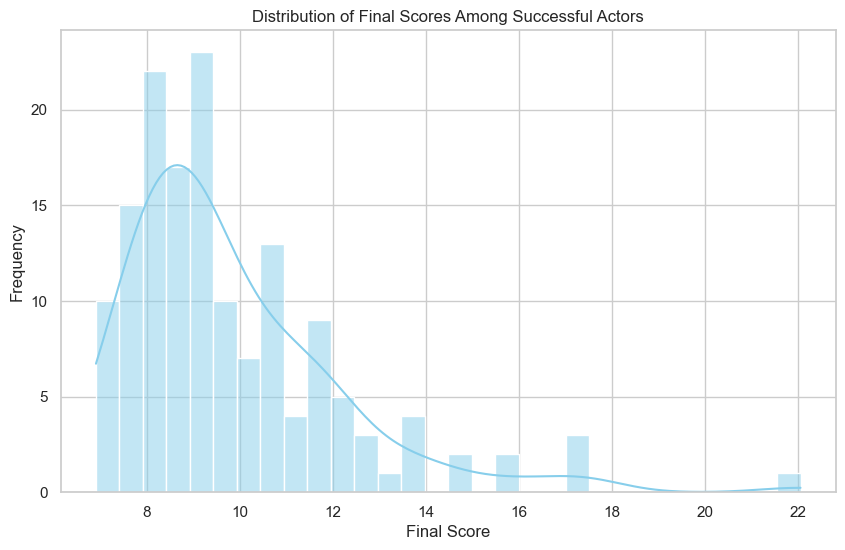

In [32]:

# 1. Distribution of Final Scores
plt.figure(figsize=(10, 6))
sns.histplot(successful_actors['final_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Final Scores Among Successful Actors')
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.show()

# 2. Top 20 Actors by Final Score
We can here see who the outlier is. Jack Nicholson is the actor with the highest final score. With a score of 22. Marlon Brando, Jack Lemmon and Paul Newan are the next highest with a close margin. (all of them have a score around 17).

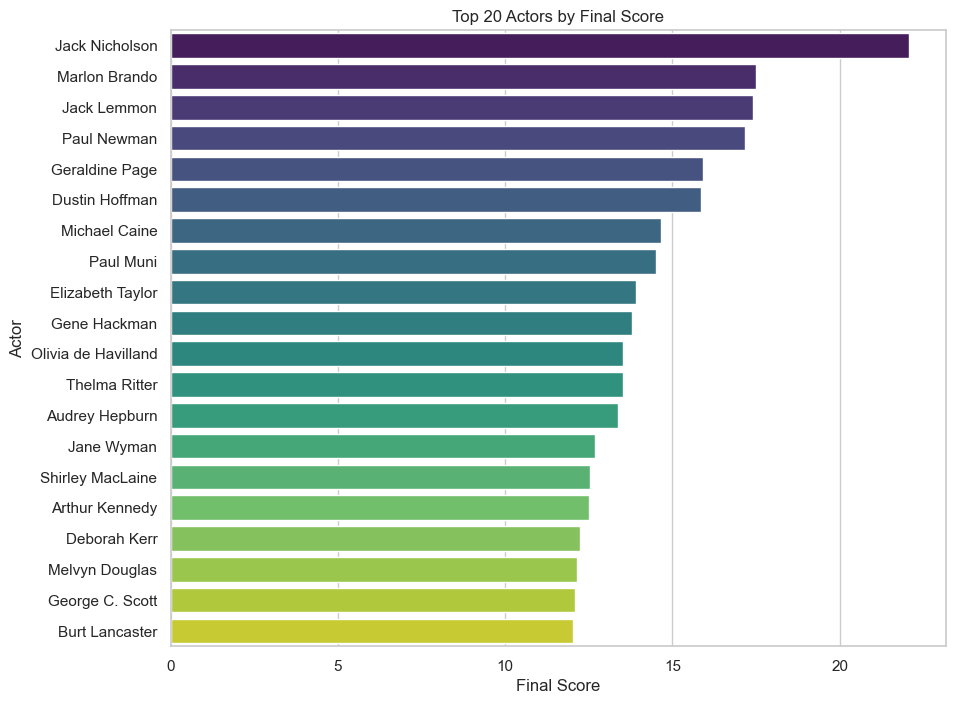

In [33]:

# 2. Top 20 Actors by Final Score
top_20_actors = successful_actors.sort_values(by='final_score', ascending=False).head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x='final_score', y=top_20_actors.index, data=top_20_actors, palette='viridis')
plt.title('Top 20 Actors by Final Score')
plt.xlabel('Final Score')
plt.ylabel('Actor')
plt.show()

# 3. Relationship between Oscar Score and IMDB Score
We can see that there is no clear relationship between the Oscar score and the IMDB score. And a gender gap is not visible. Why could this be?
One reason could be that the IMDB score is based on the average rating of the actors' movies, which is not directly related to the number of Oscar nominations and wins. One other reason could be that the IMDB score is based on the average rating of the actors' movies, which is not directly related to the number of Oscar nominations and wins. E.g. an actor could have a high IMDB score because of a few very successful movies, while not having won any Oscars.

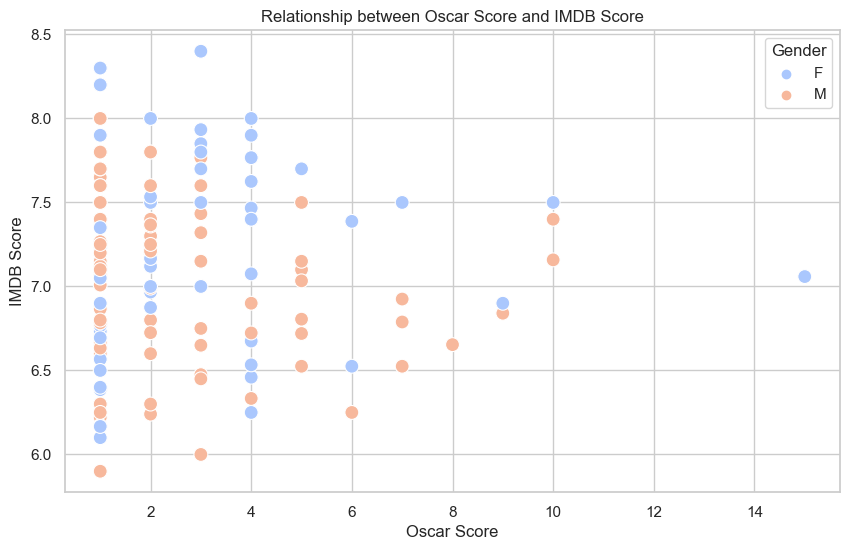

In [34]:

# 3. Relationship between Oscar Score and IMDB Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oscar_score', y='imdb_score', data=successful_actors, hue='gender', palette='coolwarm', s=100)
plt.title('Relationship between Oscar Score and IMDB Score')
plt.xlabel('Oscar Score')
plt.ylabel('IMDB Score')
plt.legend(title='Gender')
plt.show()

# 4. Distribution
We can see that the distribution of Men and Women is almost equal. Meaning that Actor success defined by our metrics is not gender biased.

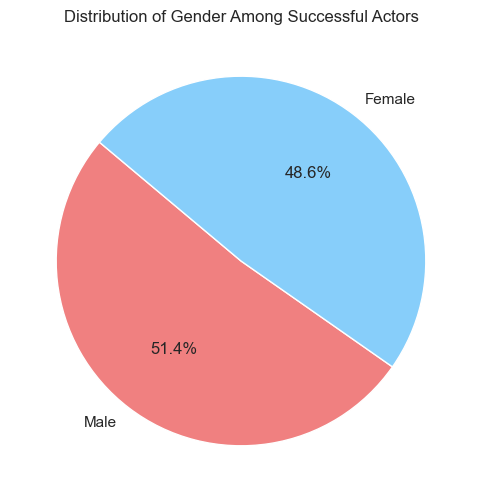

In [35]:
# 4. Distribution of Gender Among Successful Actors
plt.figure(figsize=(6, 6))
gender_counts = successful_actors['gender'].value_counts()
gender_labels = ['Male' if i == 'M' else 'Female' for i in gender_counts.index]
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Gender Among Successful Actors')
plt.show()

# 5. Top 10 Countries by Actor Count
As expected, the USA has the most successful actors by a very big Margin. Followed by the UK, Canada and France.

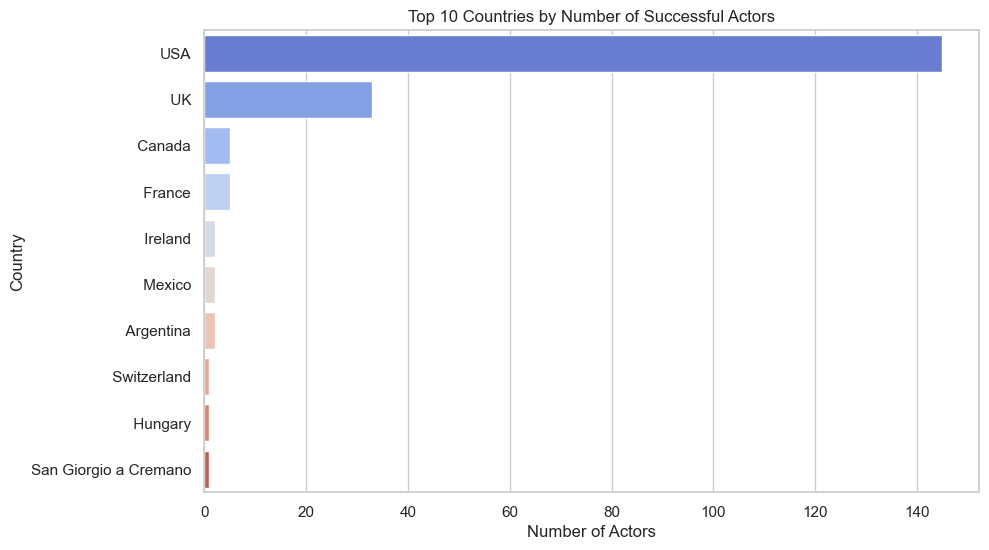

In [36]:

# 5. Top 10 Countries by Actor Count
top_countries = successful_actors['place_of_birth'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Successful Actors')
plt.xlabel('Number of Actors')
plt.ylabel('Country')
plt.show()

# 6. Relationship between Number of Movies and Final Score
We can see that there is no strong relationship between the number of movies an actor has been in and the final score. However for Men there seems to be a slight positive correlation, but only based by a few samples. Why could that be? Maybe because Men are more likely to be in more movies and more movies means more chances to win an Oscar. But whether Men are indeed more likely to have a longer career in acting is not clear from this data. However it could be plausible, because of the beauty standards in the movie industry.

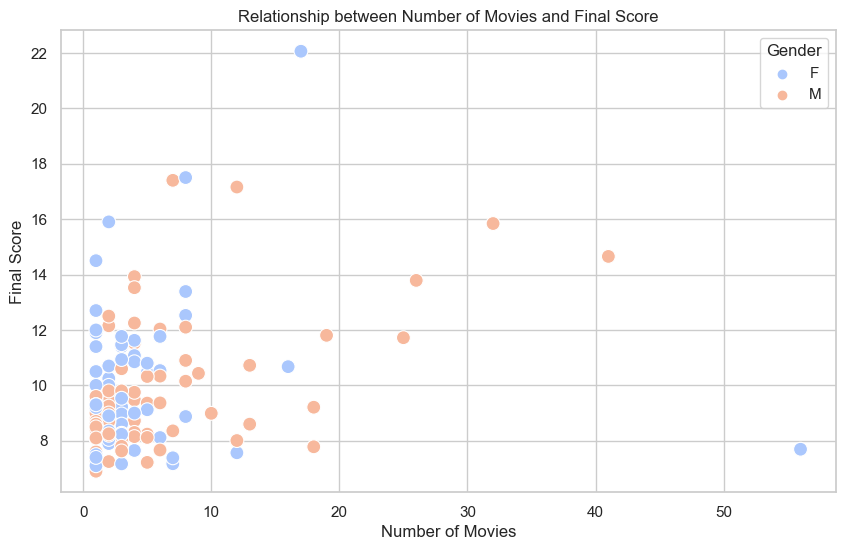

In [37]:

# 6. Relationship between Number of Movies and Final Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_movies', y='final_score', data=successful_actors, hue='gender', palette='coolwarm', s=100)
plt.title('Relationship between Number of Movies and Final Score')
plt.xlabel('Number of Movies')
plt.ylabel('Final Score')
plt.legend(title='Gender')
plt.show()

# 7. Heatmap of Correlations
We can see a very strong correlation between the Oscar score and the final score. This is expected, because the final score is the sum of the Oscar score and the IMDB score. The IMDB score has a moderate correlation with the final score. The number of movies an actor has been in has a weak correlation with the final score. and a negative correlation with the IMDB score.

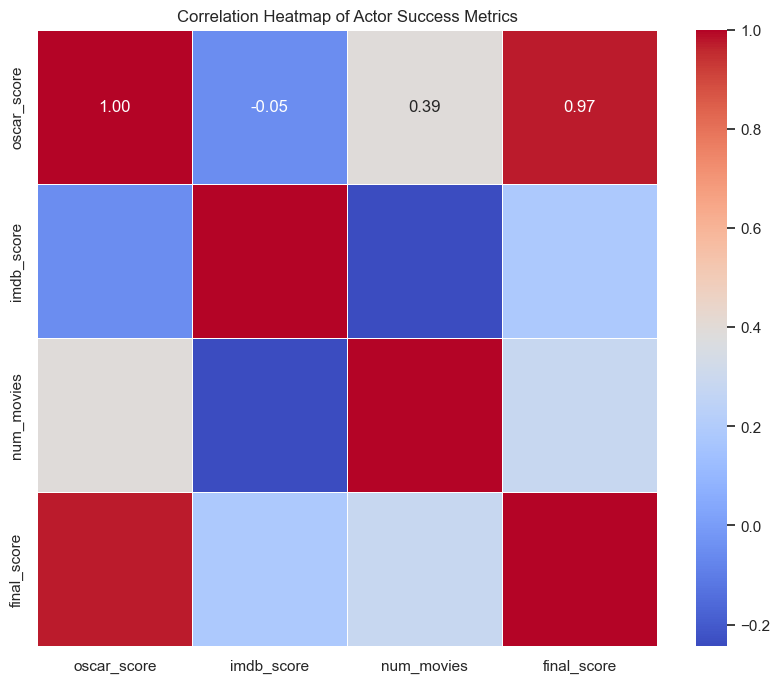

In [38]:
# 7. Heatmap of Correlations
plt.figure(figsize=(10, 8))
corr = successful_actors[['oscar_score', 'imdb_score', 'num_movies', 'final_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Actor Success Metrics')
plt.show()

# 8. Top 10 Actors by IMDB Score
We can ssee that Gloria Swanson has the highest IMDB score. Followed very closely by Jack Oakey and Margaret Sullavan. It is noticeble, that alle the top 10 actors are are between a score of 8 and 8.5. This is interesting, because the top 10 actors by final score are between 12 and 22.

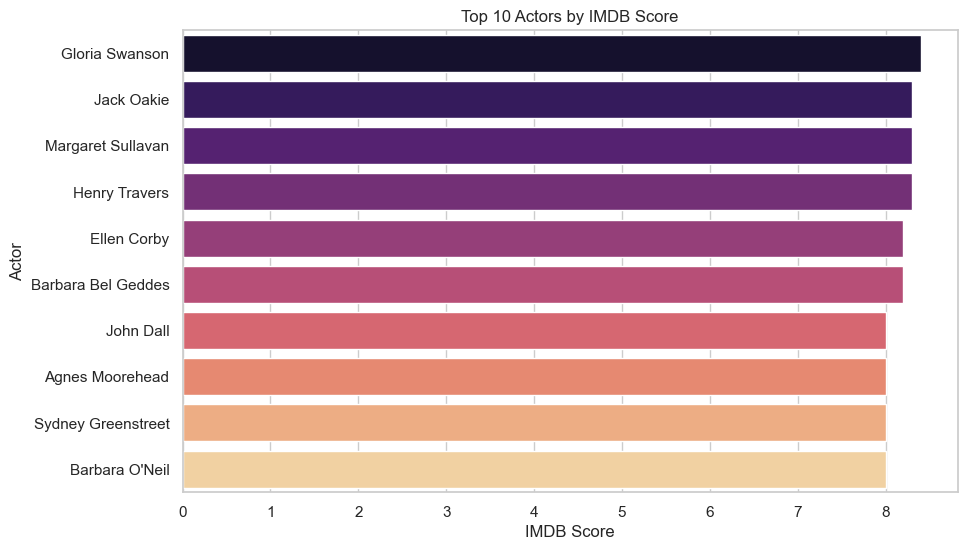

In [39]:

# 8. Top 10 Actors by IMDB Score
top_10_actors_imdb = successful_actors.sort_values(by='imdb_score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='imdb_score', y=top_10_actors_imdb.index, data=top_10_actors_imdb, palette='magma')
plt.title('Top 10 Actors by IMDB Score')
plt.xlabel('IMDB Score')
plt.ylabel('Actor')
plt.show()


# 9. Relationship between Birth Year and Final Score
We can see that actors born around the 1940s have the highest final scores. This could be because they have had the most time to build their acting career. We can also see that there is an outlier with a birth year around 1996 and a final score of 22. Who this is, we will investigate further.

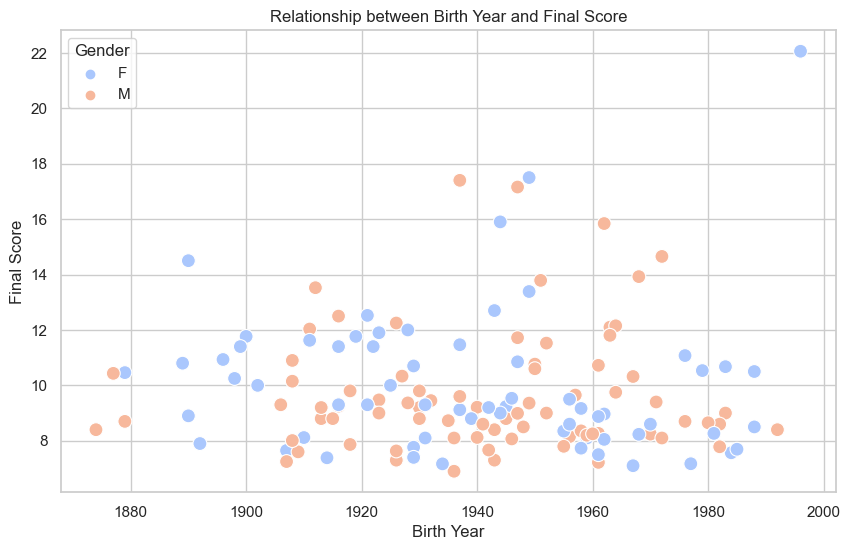

In [40]:

# 9. Relationship between Birth Year and Final Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='birthday', y='final_score', data=successful_actors, hue='gender', palette='coolwarm', s=100)
plt.title('Relationship between Birth Year and Final Score')
plt.xlabel('Birth Year')
plt.ylabel('Final Score')
plt.legend(title='Gender')
plt.show()

Interestingly, we see that Jack Nicholson is the outlier with a birth year around 1996 and a final score of 22. This is clearly a mistake in the data. Since his real birth year is 1937.

In [41]:
# who is that outlier with final score 22?
successful_actors[successful_actors['final_score'] > 20]

,oscar_score,imdb_score,num_movies,final_score,id,birthday,deathday,gender,known_for_department,place_of_birth
name,,,,,,,,,,
Jack Nicholson,15,7.058824,17,22.058824,514.0,1996.0,NaN,F,Acting,UK


In [42]:

# Optional: Save the clean DataFrame for future use
#successful_actors.to_csv('cleaned_successful_actors.csv', index=True)